# Batch gradient descent

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

Polynomial Degree: 4
Converged in 3382 iterations


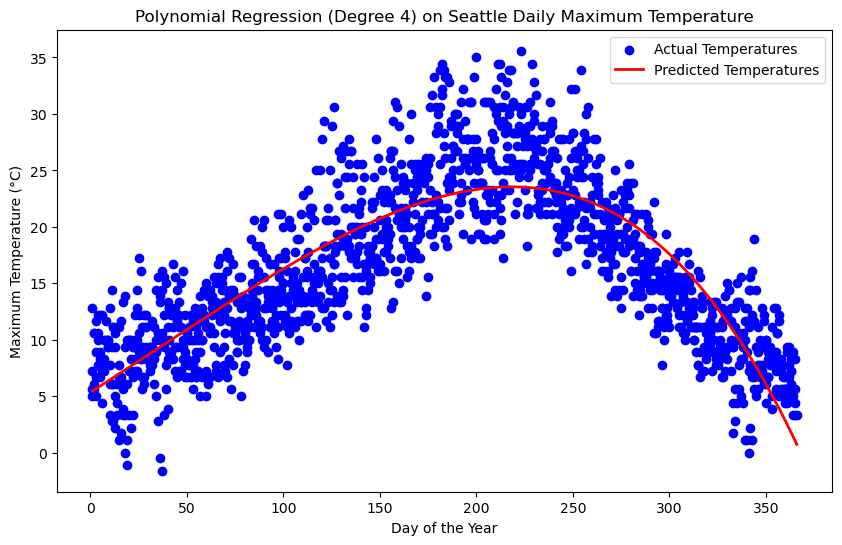

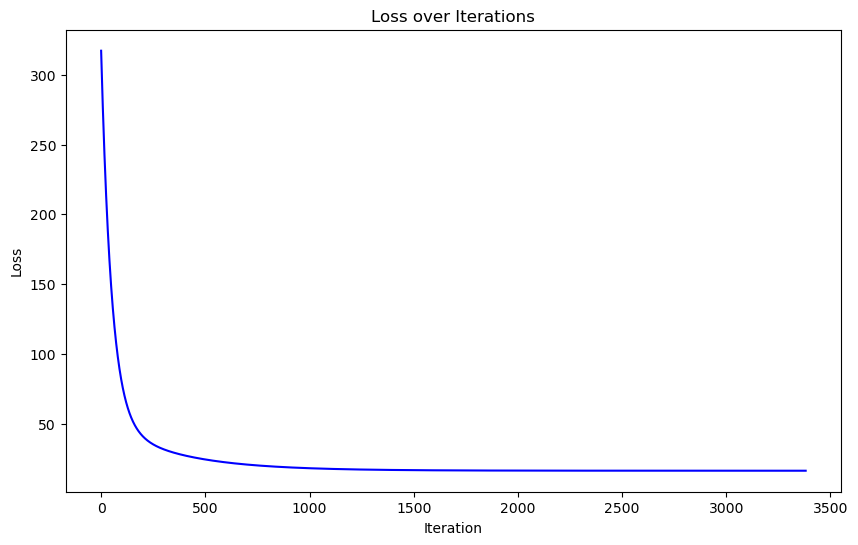

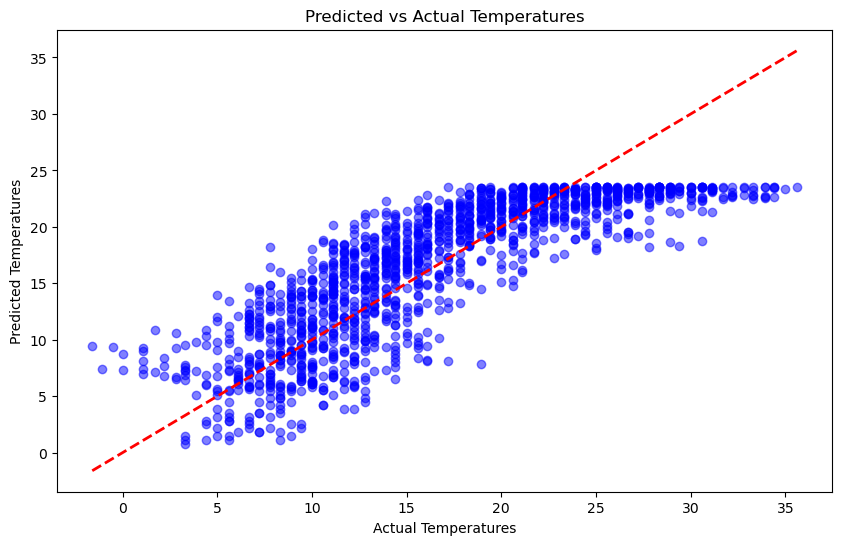

Mean Squared Error (MSE): 16.5950049933042
R-squared (R2): 0.6925824501955915


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = 'https://raw.githubusercontent.com/vega/vega-datasets/next/data/seattle-weather.csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())

# Extract features and target variable
df['DATE'] = pd.to_datetime(df['date'])
df['DAY_OF_YEAR'] = df['DATE'].dt.dayofyear
df = df.sort_values('DATE').reset_index(drop=True)

# Use 'DAY_OF_YEAR' as the feature and 'temp_max' (maximum temperature) as the target variable
X = df[['DAY_OF_YEAR']].values  # Feature: day of the year
y = df['temp_max'].values  # Target: maximum temperature

degree = 4
print(f"\nPolynomial Degree: {degree}")

# Create polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  # Random initialization
learning_rate = 0.01
convergence_threshold = 1e-5
m = len(X_b)
loss_history = []

# Batch Gradient Descent with convergence criteria
previous_loss = float('inf')
max_iterations = 10000
for iteration in range(max_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    loss = (1/m) * np.sum((X_b.dot(theta) - y)**2)
    loss_history.append(loss)

    if np.abs(previous_loss - loss) < convergence_threshold:
        print(f'Converged in {iteration + 1} iterations')
        break
    previous_loss = loss
else:
    print(f'Did not converge within {max_iterations} iterations')

# Make predictions
y_pred = X_b.dot(theta)

# Sort the values by the feature before plotting
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Temperatures')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Temperatures')
plt.xlabel('Day of the Year')
plt.ylabel('Maximum Temperature (°C)')
plt.title(f'Polynomial Regression (Degree {degree}) on Seattle Daily Maximum Temperature')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Predicted vs Actual Temperatures')
plt.show()

# Calculate and print performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Stochastic gradient descent


Polynomial Degree: 4
Converged in 4 epochs and 5285 iterations


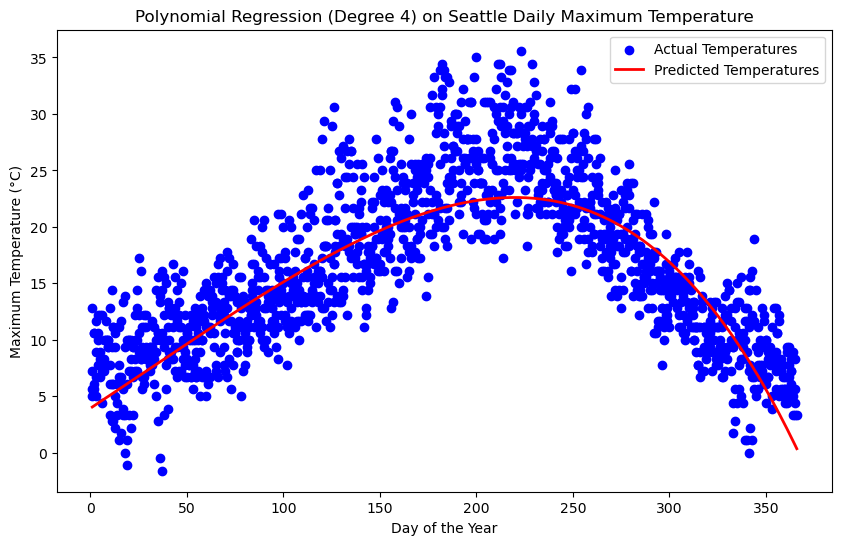

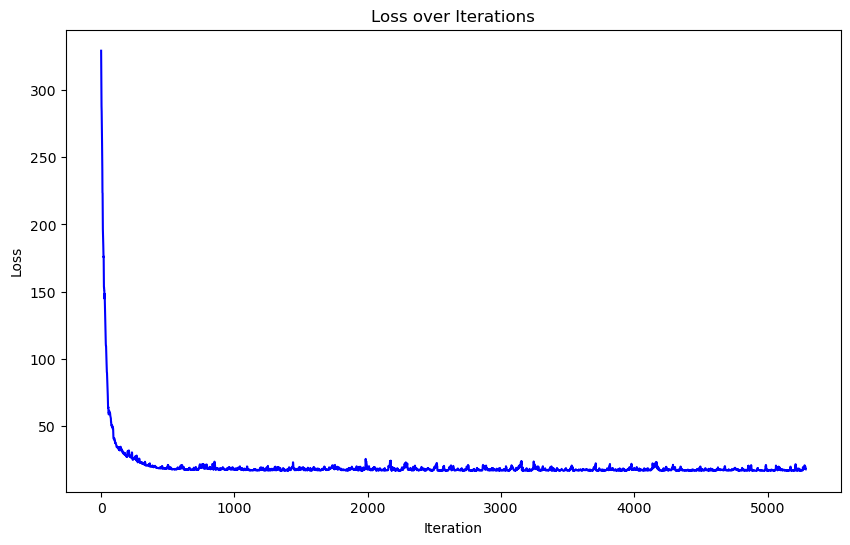

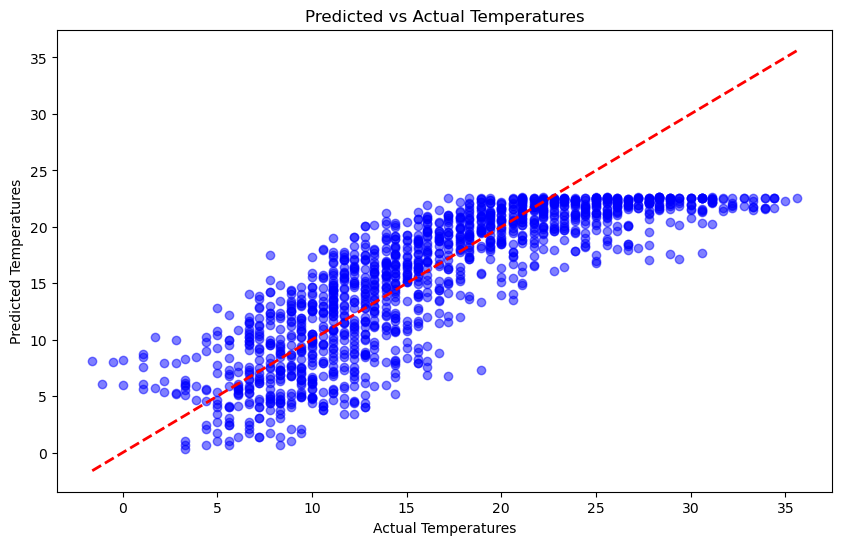

Mean Squared Error (MSE): 17.6165442371877
R-squared (R2): 0.673658738421451


In [2]:
degree = 4
print(f"\nPolynomial Degree: {degree}")

# Create polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  # Random initialization
learning_rate = 0.01
convergence_threshold = 1e-5
m = len(X_b)
loss_history = []

# Stochastic Gradient Descent with convergence criteria
previous_loss = float('inf')
max_epochs = 1000
total_iterations = 0
converged = False

for epoch in range(max_epochs):
    indices = np.random.permutation(m)
    X_b_shuffled = X_b[indices]
    y_shuffled = y[indices]
    
    for i in range(m):
        xi = X_b_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

        # Compute loss for current step
        current_loss = (1/m) * np.sum((X_b.dot(theta) - y)**2)
        loss_history.append(current_loss)
        total_iterations += 1
        
        if np.abs(previous_loss - current_loss) < convergence_threshold:
            print(f'Converged in {epoch + 1} epochs and {total_iterations} iterations')
            converged = True
            break
        
        previous_loss = current_loss
    if converged:
        break
else:
    print(f'Did not converge within {max_epochs} epochs and {total_iterations} iterations')

# Make predictions
y_pred = X_b.dot(theta)

# Sort the values by the feature before plotting
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Temperatures')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Temperatures')
plt.xlabel('Day of the Year')
plt.ylabel('Maximum Temperature (°C)')
plt.title(f'Polynomial Regression (Degree {degree}) on Seattle Daily Maximum Temperature')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Predicted vs Actual Temperatures')
plt.show()

# Calculate and print performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Adam optimizer


Polynomial Degree: 4
Did not converge within 10000 iterations


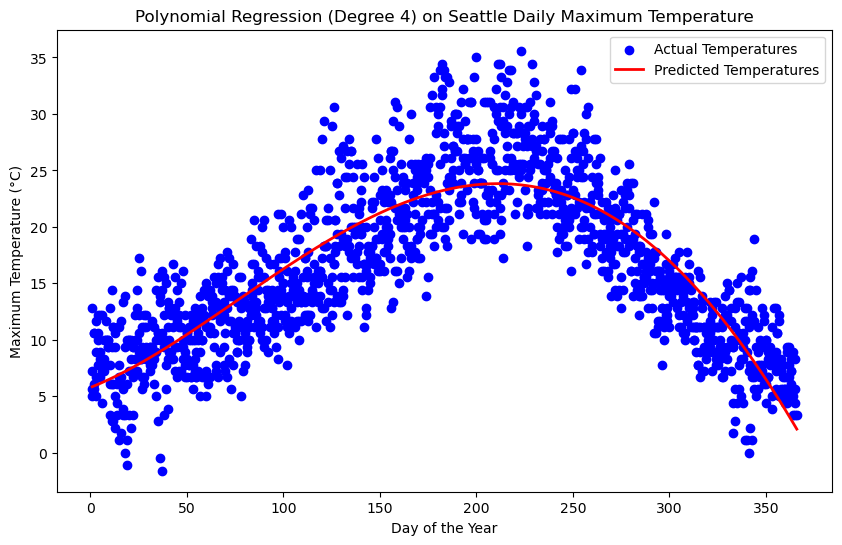

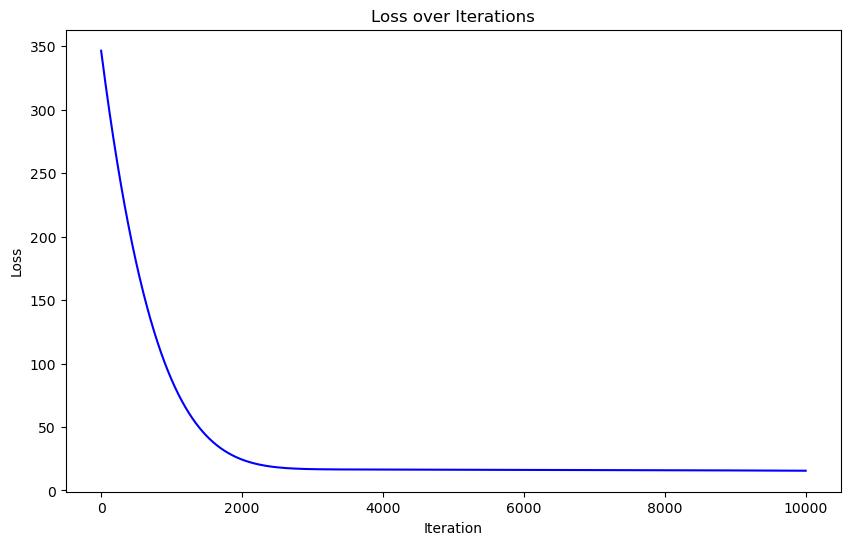

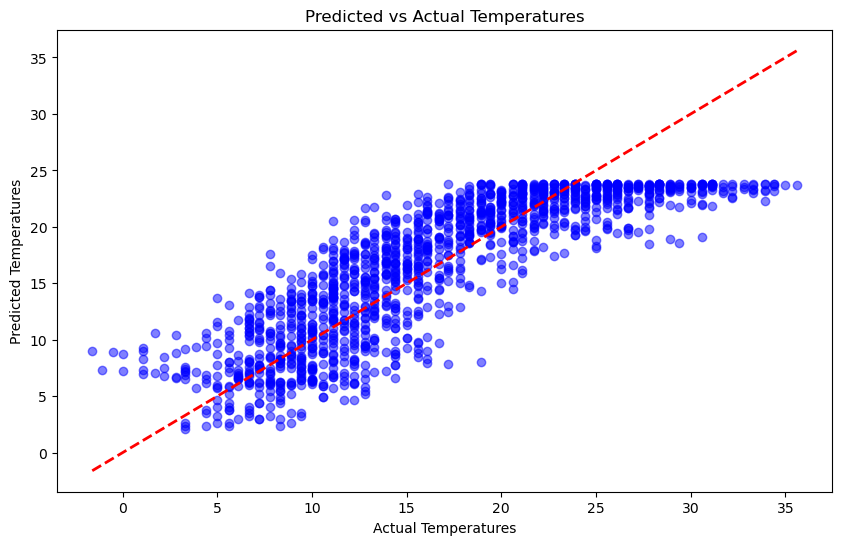

Mean Squared Error (MSE): 15.526537944676804
R-squared (R2): 0.7123754856462174


In [3]:
degree = 4
print(f"\nPolynomial Degree: {degree}")

# Create polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Initialize parameters for Adam
theta = np.random.randn(X_b.shape[1])  # Random initialization
learning_rate = 0.01
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-5
m = len(X_b)
loss_history = []

# Adam-specific parameters
m_t = np.zeros_like(theta)  # Initialize first moment vector
v_t = np.zeros_like(theta)  # Initialize second moment vector
t = 0  # Initialize timestep

# Adam with convergence criteria
previous_loss = float('inf')
convergence_threshold = 1e-5
max_iterations = 10000

for iteration in range(max_iterations):
    t += 1
    
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    
    m_t = beta_1 * m_t + (1 - beta_1) * gradients
    v_t = beta_2 * v_t + (1 - beta_2) * gradients**2
    
    m_hat = m_t / (1 - beta_1**t)
    v_hat = v_t / (1 - beta_2**t)
    
    theta = theta - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    
    loss = (1/m) * np.sum((X_b.dot(theta) - y)**2)
    loss_history.append(loss)
    
    if np.abs(previous_loss - loss) < convergence_threshold:
        print(f'Converged in {iteration + 1} iterations')
        break
    
    previous_loss = loss
else:
    print(f'Did not converge within {max_iterations} iterations')

# Make predictions
y_pred = X_b.dot(theta)

# Sort the values by the feature before plotting
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the data and regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Temperatures')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Temperatures')
plt.xlabel('Day of the Year')
plt.ylabel('Maximum Temperature (°C)')
plt.title(f'Polynomial Regression (Degree {degree}) on Seattle Daily Maximum Temperature')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Predicted vs Actual Temperatures')
plt.show()

# Calculate and print performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Object Oriented Programming: NumPy is an object, we can create our own object

In [4]:
a = np.array([1, 2, 3, 4])

In [5]:
a.min()

1

In [30]:
# Structure of a class

class NameOfClass():

    # Global/constant object parameter
    param0 = 0

    # Define or initialize the attributes or properties

    def __init__(self, param1, param2):
        self.param1 = param1
        self.param2 = param2

    # Define methods or functions for the object

    def some_method(self):
        print(self.param2 + 5)

In [24]:
name = NameOfClass(4, 8)

In [25]:
type(name)

__main__.NameOfClass

In [26]:
name.param0

0

In [38]:
# Class inheritance

class Dog:
    def __init__(self, name, age, sound):
        self.name = name
        self.age = age
        self.sound = sound
    def speak(self):
        return f"{self.name} says {self.sound}"

In [39]:
class Bulldog(Dog): # Here we are inheriting parent class 'Dog', it will use all attributes and methods of class Dog
    
    def run(self, speed):
        return f"{self.name} runs {speed}"

In [40]:
bull = Bulldog('Tommy', 9, 'hello')

In [43]:
bull.speak()

'Tommy says hello'